In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

## Load Data:

In [87]:
train = pd.read_csv("train.csv", header=0)
test = pd.read_csv("test.csv", header=0)
validate = pd.read_csv("validate.csv", header=0)

In [88]:
train.dtypes

Number_of_valued_Kneset_members                         float64
Yearly_IncomeK                                          float64
Overall_happiness_score                                 float64
Avg_Satisfaction_with_previous_vote                     float64
Garden_sqr_meter_per_person_in_residancy_area           float64
Weighted_education_rank                                 float64
Vote                                                     object
Number_of_valued_Kneset_members_isNull                    int64
Yearly_IncomeK_isNull                                     int64
Overall_happiness_score_isNull                            int64
Avg_Satisfaction_with_previous_vote_isNull                int64
Garden_sqr_meter_per_person_in_residancy_area_isNull      int64
Weighted_education_rank_isNull                            int64
Most_Important_Issue_int                                  int64
Will_vote_only_large_party_int                            int64
dtype: object

## Arrange Classifiers:

In [89]:
names = ["Nearest Neighbors", "Naive Bayes", "Decision Tree", "Perceptron", 
         "Linear SVM OVO", "Linear SVM OVR", "MLP"] 

In [90]:
classifiers = {
    KNeighborsClassifier(1):"Nearest Neighbors",
    GaussianNB():"Naive Bayes",
    DecisionTreeClassifier(max_depth=5):"Decision Tree",
    Perceptron(n_iter=100):"Perceptron",
    SVC(kernel="linear", C=1):"Linear SVM OVO",
    LinearSVC(C=1):"Linear SVM OVR",
    MLPClassifier(verbose=0, activation='relu', hidden_layer_sizes=(50, 25, 10), 
                  random_state=0, max_iter=500, solver='sgd', 
                  learning_rate='invscaling', momentum=.9,
                  nesterovs_momentum=True, learning_rate_init=0.2):"MLP"}
    

## Arrange data sets:

In [91]:
X_train = train.drop(['Vote'],1)
Y_train = train.Vote
X_test = train.drop(['Vote'],1)
Y_test = train.Vote
X_validate = validate.drop(['Vote'],1)
Y_validate = validate.Vote

## Run over classifiers:

In [92]:
test_scores = {"Nearest Neighbors":0, "Naive Bayes":0, "Decision Tree":0, "Perceptron":0, 
         "Linear SVM OVO":0, "Linear SVM OVR":0, "MLP":0}

In [93]:
# iterate over classifiers

for clf in classifiers:
    clf.fit(X_train, Y_train)
    test_scores[classifiers[clf]] = clf.score(X_test, Y_test)


/Users/odedgolden/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [94]:
test_scores

{'Decision Tree': 0.78766666666666663,
 'Linear SVM OVO': 0.91200000000000003,
 'Linear SVM OVR': 0.63400000000000001,
 'MLP': 0.18966666666666668,
 'Naive Bayes': 0.85450000000000004,
 'Nearest Neighbors': 1.0,
 'Perceptron': 0.64366666666666672}

In [112]:
validate_scores = {"Nearest Neighbors":0, "Naive Bayes":0, "Decision Tree":0, "Perceptron":0, 
         "Linear SVM OVO":0, "Linear SVM OVR":0, "MLP":0}
validate_confusion = {"Nearest Neighbors":0, "Naive Bayes":0, "Decision Tree":0, "Perceptron":0, 
         "Linear SVM OVO":0, "Linear SVM OVR":0, "MLP":0}
validate_cross = {"Nearest Neighbors":0, "Naive Bayes":0, "Decision Tree":0, "Perceptron":0, 
         "Linear SVM OVO":0, "Linear SVM OVR":0, "MLP":0}

In [121]:
for clf in classifiers:
    validate_scores[classifiers[clf]] = clf.score(X_validate, Y_validate)
    validate_cross[classifiers[clf]] = cross_val_score(clf, X_validate, Y_validate, cv=2)
    predictions = clf.predict(X_validate)
    conf = confusion_matrix(Y_validate, predictions, labels=None, sample_weight=None)
    n = len(conf[0])
    validate_confusion[classifiers[clf]] = conf.sum() - sum(conf[i][i] for i in range(n))

/Users/odedgolden/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/odedgolden/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [107]:
validate_cross

{'Decision Tree': array([ 0.81930693,  0.81296758,  0.79      ,  0.8245614 ,  0.8030303 ]),
 'Linear SVM OVO': array([ 0.89108911,  0.87780549,  0.9075    ,  0.87969925,  0.88131313]),
 'Linear SVM OVR': array([ 0.46287129,  0.73067332,  0.605     ,  0.70426065,  0.61363636]),
 'MLP': array([ 0.09405941,  0.21446384,  0.095     ,  0.21553885,  0.21717172]),
 'Naive Bayes': array([ 0.76237624,  0.78802993,  0.5625    ,  0.58897243,  0.83080808]),
 'Nearest Neighbors': array([ 0.62871287,  0.66583541,  0.665     ,  0.68170426,  0.65656566]),
 'Perceptron': array([ 0.35148515,  0.36408978,  0.515     ,  0.39348371,  0.41666667])}

In [97]:
validate_scores

{'Decision Tree': 0.77700000000000002,
 'Linear SVM OVO': 0.90400000000000003,
 'Linear SVM OVR': 0.63500000000000001,
 'MLP': 0.183,
 'Naive Bayes': 0.84750000000000003,
 'Nearest Neighbors': 0.754,
 'Perceptron': 0.63600000000000001}

In [122]:
validate_confusion

{'Decision Tree': 446,
 'Linear SVM OVO': 192,
 'Linear SVM OVR': 730,
 'MLP': 1634,
 'Naive Bayes': 305,
 'Nearest Neighbors': 492,
 'Perceptron': 728}

## Choose classifiers:

The best score is for Linear SVM OVO

In [98]:
svm = classifiers.keys()[classifiers.values().index('Nearest Neighbors')]

## Predict Election Results:

In [99]:
predictions = svm.predict(X_test)
parties = Y_train.unique()

In [100]:
# predictions
parties

array(['Greens', 'Purples', 'Browns', 'Pinks', 'Whites', 'Blues', 'Reds',
       'Yellows', 'Greys', 'Oranges'], dtype=object)

In [101]:
results = {'Purples':0, 'Browns':0, 'Greens':0, 'Blues':0, 'Whites':0, 'Pinks':0, 'Reds':0,
       'Oranges':0, 'Yellows':0, 'Greys':0}

In [102]:
for p in predictions:
    for party in parties:
        if p==party:
            results[party]= results[party]+1
            
            

In [103]:
len(predictions)
results

{'Blues': 559,
 'Browns': 1138,
 'Greens': 970,
 'Greys': 340,
 'Oranges': 329,
 'Pinks': 632,
 'Purples': 1226,
 'Reds': 298,
 'Whites': 207,
 'Yellows': 301}

## Plot results pie:

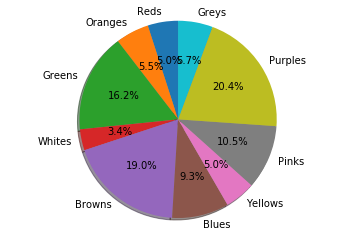

In [104]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = results.keys()
sizes = results.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=[0]*len(sizes), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Plot real results pie

## Confusion Matrix:

In [72]:
confusion_matrix(Y_validate, predictions, labels=None, sample_weight=None)

array([[166,   0,   0,   0,   0,   0,   0,   0,   0,  18],
       [  0, 369,   0,   0,   0,   2,   3,   0,   2,   0],
       [  0,   0, 319,   0,   0,   0,   2,   0,   0,   0],
       [  0,   1,   0, 113,  10,   0,   0,   3,   0,   0],
       [  0,   0,   0,   2,  91,   0,   0,   6,   0,   0],
       [  0,  27,   0,   0,   0, 187,   4,   0,   2,   0],
       [  0,  24,   1,   0,   0,   4, 364,   0,   7,   0],
       [  0,   0,   0,   5,  11,   0,   1,  93,   0,   0],
       [  0,  11,   0,   0,   0,   9,  11,   0,  33,   0],
       [ 20,   0,   0,   0,   0,   0,   0,   0,   0,  79]])